# Uvod #

U tutorialu smo naučili o sastavnim dijelovima neuronskih mreža: *linearne jedinice*. Vidjeli smo da će model samo jedne linearne jedinice prilagoditi linearnu funkciju skupu podataka (ekvivalentno linearnoj regresiji). U ovoj ćete vježbi izgraditi linearni model i steći praksu rada s modelima u Kerasu.

Prije nego počnete, pokrenite ćeliju s kodom u nastavku da biste sve postavili.

In [1]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)



Skup podataka o *Red Wine Quality* sastoji se od fizikalno-kemijskih mjerenja za oko 1600 portugalskih crnih vina. Također je uključena ocjena kvalitete za svako vino iz slijepih proba.

Prvo pokrenite sljedeću ćeliju za prikaz prvih nekoliko redaka ovog skupa podataka.

In [4]:
import pandas as pd

red_wine = pd.read_csv('./input/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Možete dobiti broj redaka i stupaca podatkovnog okvira (ili Numpy polja) pomoću atributa `shape`.

In [8]:
red_wine.shape # (rows, columns)

(1599, 12)

# 1) Unesite oblik #

Koliko dobro možemo predvidjeti percipiranu kvalitetu vina iz fizikalno-kemijskih mjerenja?

Cilj je `'quality'`, a preostali stupci su karakteristike. Kako biste postavili parametar `input_shape` za Keras model na ovom zadatku?

In [18]:
# YOUR CODE HERE
input_shape = [red_wine.shape[1]-1]


# 2) Definirajte linearni model

Sada definirajte linearni model prikladan za ovaj zadatak. Obratite pozornost na to koliko ulaza i izlaza model treba imati.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

c:\Users\A507\Desktop\RFlab\MJ\lab\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Pogledajte težine

Interno, Keras predstavlja težine neuronske mreže s **tenzorima**. Tenzori su u osnovi TensorFlowova verzija Numpy polja s nekoliko razlika koje ih čine prikladnijima za duboko učenje. Jedan od najvažnijih je da su tenzori kompatibilni s akceleratorima [GPU](https://www.kaggle.com/docs/efficient-gpu-usage) i [TPU](https://www.kaggle.com/docs/tpu)). TPU su, zapravo, dizajnirani posebno za tenzorska izračunavanja.

Težine modela čuvaju se u atributu `weights` kao popis tenzora. Dobijte težine modela koji ste gore definirali. (Ako želite, možete prikazati težine s nečim poput: `print("Weights\n{}\n\nBias\n{}".format(w, b))`).

In [3]:
# YOUR CODE HERE
w, b = model.weights

(Usput, Keras predstavlja težine kao tenzore, ali također koristi tenzore za predstavljanje podataka. Kada postavite argument `input_shape`, govorite Kerasu dimenzije niza koje treba očekivati ​​za svaki primjer u podacima za obuku. Postavka ` input_shape=[3]` bi kreirala mrežu koja prihvaća vektore duljine 3, kao primjerice `[0.2, 0.4, 0.6]`.)


# Izborno: iscrtajte izlaz neobučenog linearnog modela

Vrste problema na kojima ćemo raditi kroz neke od sljedećih lekcija je *regresijski* problemi, gdje je cilj predvidjeti neki numerički cilj. Problemi regresije su poput problema "prilagođavanja krivulje": pokušavamo pronaći krivulju koja najbolje odgovara podacima. Pogledajmo "krivulju" koju proizvodi linearni model. (Vjerojatno ste pogodili da je to linija!)

Spomenuli smo da se prije treninga težine modela postavljaju nasumično. Pokrenite donju ćeliju nekoliko puta da vidite različite retke proizvedene nasumičnim inicijaliziranjem. (Ne postoji kodiranje za ovu vježbu -- to je samo demonstracija.)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

c:\Users\A507\Desktop\RFlab\MJ\lab\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


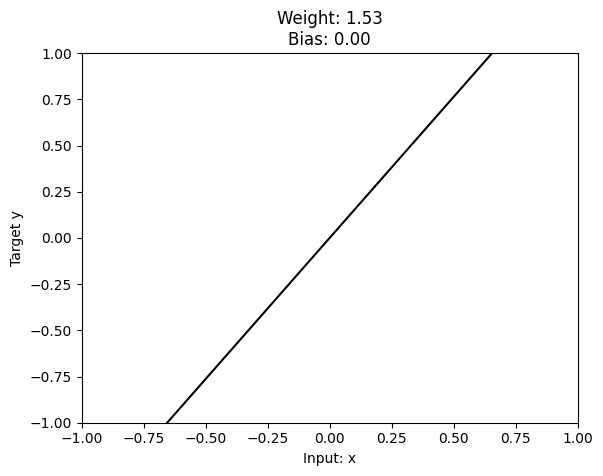

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# Nastavak #

Dodajte skrivene slojeve i [**učinite svoj model dubokim**](Deep_Neural_Networks_hr.ipynb).